In [1816]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

Data Collection and Data Processing

In [1817]:
#Loading data into pandas dataframe
sonar_data = pd.read_csv('Copy of sonar data.csv', header=None)

In [1818]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [1819]:
#number of rows and columns
sonar_data.shape

(208, 61)

In [1820]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [1821]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [1822]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [1823]:
#Seperate data and labels
X = sonar_data.drop(columns=[60], axis=1)
Y = sonar_data[60]

Training and Testing data

In [1824]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y)

Model Training

In [1825]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

svm = SVC(C=0.6, kernel='poly')
svm.fit(X_train, Y_train)

SVC(C=0.6, kernel='poly')

Logistic Regression Evaluation

In [1826]:
#Accuracy of training data for logistic regression
training_prediction = logistic_regression.predict(X_train)
training_accuracy = accuracy_score(training_prediction, Y_train)
print("Accuracy on training data: ", training_accuracy)

Accuracy on training data:  0.8556149732620321


In [1827]:
#Accuracy of testing data for logistic regression
testing_prediction = logistic_regression.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction, Y_test)
print("Accuracy on testing data: ", testing_accuracy)

Accuracy on testing data:  0.6666666666666666


SVM Evaluation

In [1828]:
#Accuracy of training data for SVM
training_prediction = svm.predict(X_train)
training_accuracy = accuracy_score(training_prediction, Y_train)
print("Accuracy on training data: ", training_accuracy)

Accuracy on training data:  0.9144385026737968


In [1829]:
#Accuracy of testing data for SVM
testing_prediction = svm.predict(X_test)
testing_accuracy = accuracy_score(testing_prediction, Y_test)
print("Accuracy on testing data: ", testing_accuracy)

Accuracy on testing data:  0.7619047619047619


Learning Curves

Text(0, 0.5, 'Score')

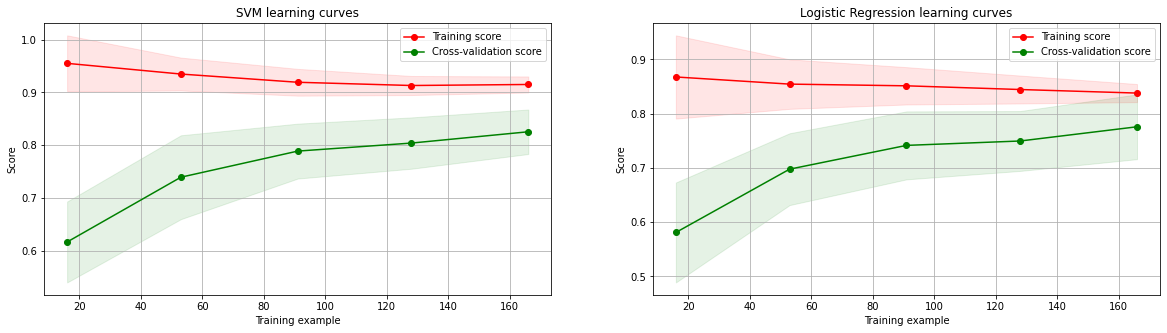

In [1830]:
cv = ShuffleSplit(n_splits=50, test_size=0.2)

train_sizes, train_scores, test_scores = learning_curve(svm, X, Y, cv=cv)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

_, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
)

axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")

axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
)
axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
axes[0].grid()
axes[0].legend()

train_sizes, train_scores, test_scores = learning_curve(logistic_regression, X, Y, cv=cv)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

axes[1].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
)

axes[1].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")

axes[1].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
)
axes[1].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
axes[1].grid()
axes[1].legend(loc='best')

axes[0].set_title('SVM learning curves')
axes[0].set_xlabel('Training example')
axes[0].set_ylabel('Score')

axes[1].set_title('Logistic Regression learning curves')
axes[1].set_xlabel('Training example')
axes[1].set_ylabel('Score')